##### %%writefile test
## Midterm
<b>The objective of the first part of the midterm is to detect blue cursor, yellow timer, and human skin from input video. Your output should be similar to midterm_demo.mp4. Please complete steps 1-8 in one single code cell. The whole process can be divided to the following steps:</b>
1. (5pts) Input images from video file WiiPlay.mp4 with the same level number as the last two digits of your student id, and show the images in the "input" window.
2. (5pts) Use <i>cv2.cvtColor()</i> to convert images from BGR to HSV format.
3. (5pts) Use <i>cv2.createTrackbar()</i> to create six trackbars (HueMin, HueMax, SatMin SatMax, ValMin, ValMax), and use <i>cv2.getTrackbarPos()</i> to get the current value of each trackbar.
4. (5pts) Use <i>cv2.threshold()</i> or <i>cv2.inRange()</i> to apply double thresholding to each channel (Hue, Sat, Val) based on current values of the six trackbars
5. (5pts) Apply morphological filters to remove noise (outliers & holes), and show the detected regions in the "test" window..
6. (10pts) Find out the best color range to detect <b>blue cursor</b>, apply these thresholds, and show the detected regions in the "cursor" window.
7. (10pts) Find out the best color range to detect <b>yellow timer</b>, apply these thresholds, and show the detected regions in the "timer" window.
8. (10pts) Find out the best color range to detect <b>human skin</b>, apply these thresholds, and show the detected regions in the "skin" window.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
def nothing(x):
    pass

cap = cv2.VideoCapture("WiiPlay.mp4")

if not cap.isOpened():
    raise IOError("Cannot open the video file")

frame_start = 150
frame_end = 437

cap.set(cv2.CAP_PROP_POS_FRAMES, frame_start)
cv2.namedWindow('input')
cv2.namedWindow('test')
cv2.namedWindow('cursor')
cv2.namedWindow('timer')
cv2.namedWindow('skin')

# 3. Use cv2.createTrackbar() to create six trackbars
cv2.createTrackbar('HueMin', 'test', 0, 30, nothing)
cv2.createTrackbar('HueMax', 'test', 0, 150, nothing)
cv2.createTrackbar('SatMin', 'test', 0, 10, nothing)
cv2.createTrackbar('SatMax', 'test', 0, 120, nothing)
cv2.createTrackbar('ValMin', 'test', 0, 50, nothing)
cv2.createTrackbar('ValMax', 'test', 0, 200, nothing)

cv2.createTrackbar('BlueHueMin', 'cursor', 100, 180, nothing)
cv2.createTrackbar('BlueHueMax', 'cursor', 120, 180, nothing)
cv2.createTrackbar('BlueSatMin', 'cursor', 100, 255, nothing)
cv2.createTrackbar('BlueSatMax', 'cursor', 255, 255, nothing)
cv2.createTrackbar('BlueValMin', 'cursor', 100, 255, nothing)
cv2.createTrackbar('BlueValMax', 'cursor', 255, 255, nothing)

cv2.createTrackbar('YellowHueMin', 'timer', 20, 30, nothing)
cv2.createTrackbar('YellowHueMax', 'timer', 30, 30, nothing)
cv2.createTrackbar('YellowSatMin', 'timer', 100, 255, nothing)
cv2.createTrackbar('YellowSatMax', 'timer', 255, 255, nothing)
cv2.createTrackbar('YellowValMin', 'timer', 100, 255, nothing)
cv2.createTrackbar('YellowValMax', 'timer', 255, 255, nothing)

cv2.createTrackbar('SkinHueMin', 'skin', 0, 30, nothing)
cv2.createTrackbar('SkinHueMax', 'skin', 20, 30, nothing)
cv2.createTrackbar('SkinSatMin', 'skin', 40, 255, nothing)
cv2.createTrackbar('SkinSatMax', 'skin', 255, 255, nothing)
cv2.createTrackbar('SkinValMin', 'skin', 50, 255, nothing)
cv2.createTrackbar('SkinValMax', 'skin', 255, 255, nothing)

current_frame = frame_start

while True:
    ret, frame = cap.read()

    if not ret:
        print("Reached end of video")
        break
    
    """ 
    1.Input images from video file WiiPlay.mp4 
    with the same level number as the last two digits of your student id, 
    and show the images in the "input" window
    """
    cv2.imshow('input', frame)

    # 2. Use cv2.cvtColor() to convert images from BGR to HSV format.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # 3. use cv2.getTrackbarPos() to get the current value of each trackbar.
    hmin = cv2.getTrackbarPos('HueMin', 'test')
    hmax = cv2.getTrackbarPos('HueMax', 'test')
    smin = cv2.getTrackbarPos('SatMin', 'test')
    smax = cv2.getTrackbarPos('SatMax', 'test')
    vmin = cv2.getTrackbarPos('ValMin', 'test')
    vmax = cv2.getTrackbarPos('ValMax', 'test')

    blue_h_min = cv2.getTrackbarPos('BlueHueMin', 'cursor')
    blue_h_max = cv2.getTrackbarPos('BlueHueMax', 'cursor')
    blue_s_min = cv2.getTrackbarPos('BlueSatMin', 'cursor')
    blue_s_max = cv2.getTrackbarPos('BlueSatMax', 'cursor')
    blue_v_min = cv2.getTrackbarPos('BlueValMin', 'cursor')
    blue_v_max = cv2.getTrackbarPos('BlueValMax', 'cursor')

    # Get current trackbar positions for yellow timer detection
    yellow_h_min = cv2.getTrackbarPos('YellowHueMin', 'timer')
    yellow_h_max = cv2.getTrackbarPos('YellowHueMax', 'timer')
    yellow_s_min = cv2.getTrackbarPos('YellowSatMin', 'timer')
    yellow_s_max = cv2.getTrackbarPos('YellowSatMax', 'timer')
    yellow_v_min = cv2.getTrackbarPos('YellowValMin', 'timer')
    yellow_v_max = cv2.getTrackbarPos('YellowValMax', 'timer')

    skin_h_min = cv2.getTrackbarPos('SkinHueMin', 'skin')
    skin_h_max = cv2.getTrackbarPos('SkinHueMax', 'skin')
    skin_s_min = cv2.getTrackbarPos('SkinSatMin', 'skin')
    skin_s_max = cv2.getTrackbarPos('SkinSatMax', 'skin')
    skin_v_min = cv2.getTrackbarPos('SkinValMin', 'skin')
    skin_v_max = cv2.getTrackbarPos('SkinValMax', 'skin')


    lower = np.array([hmin, smin, vmin])
    upper = np.array([hmax, smax, vmax])
    mask = cv2.inRange(hsv, lower, upper)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=1)
    mask = cv2.dilate(mask, kernel, iterations=1)

    lower_yellow = np.array([yellow_h_min, yellow_s_min, yellow_v_min])
    upper_yellow = np.array([yellow_h_max, yellow_s_max, yellow_v_max])
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Define lower and upper bounds for blue cursor detection
    lower_blue = np.array([blue_h_min, blue_s_min, blue_v_min])
    upper_blue = np.array([blue_h_max, blue_s_max, blue_v_max])

    # Threshold the HSV image to get only blue cursor
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # Define lower and upper bounds for skin detection
    lower_skin = np.array([skin_h_min, skin_s_min, skin_v_min])
    upper_skin = np.array([skin_h_max, skin_s_max, skin_v_max])

    # Threshold the HSV image to get only skin
    mask_skin = cv2.inRange(hsv, lower_skin, upper_skin)

    # Apply morphological operations to remove noise
    kernel = np.ones((5, 5), np.uint8)
    mask_blue = cv2.erode(mask_blue, kernel, iterations=1)
    mask_blue = cv2.dilate(mask_blue, kernel, iterations=1)

    mask_yellow = cv2.erode(mask_yellow, kernel, iterations=1)
    mask_yellow = cv2.dilate(mask_yellow, kernel, iterations=1)

    mask_skin = cv2.erode(mask_skin, kernel, iterations=1)
    mask_skin = cv2.dilate(mask_skin, kernel, iterations=1)

    cv2.imshow('input', frame)
    cv2.imshow('test', mask)
    cv2.imshow('cursor', mask_blue)
    cv2.imshow('timer', mask_yellow)
    cv2.imshow('skin', mask_skin)
    current_frame += 1

    if current_frame > frame_end:
        break

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/infor/miniconda3/envs/computervision/lib/python3.9/site-packages/cv2/qt/plugins"


<b>The objective of the second part of the midterm is to stitch images together. Your output should be similar to the following picture. The coordinates of four pairs of corresponding points between two consecutive images should be provided <b style="color:red;">manually</b> (don't match automatically). Please complete steps 9-12 in one single code cell, steps 13-14 in another markdown cell, and upload your Jupyter notebook file (*.ipynb).</b>

9. (5pts) Given a pair of images (pier_1.jpg, pier_2.jpg), use <i>cv2.getPerspectiveTransform()</i> to get Homography Matrix by specifing the coordinates of four pairs of corresponding points <b>manually</b>.
10. (10pts) Use <i>cv2.warpPerspective()</i> and the Homography Matrix to get the projective view of the second image. You might need to make the output image larger enough to fit the projective image.
11. (10pts) Use <i>cv2.add()</i> to stitch two images together.
12. (10pts) Given a set of three images (pier_1.jpg, pier_2.jpg, pier_3.jpg) and their corresponding points, try to stitch them together.
13. (5pts) Any comments regarding the midterm? Which steps you believe you have completed? Which steps bother you?
14. (5pts) Any comments regarding the classes up to now? pace too fast or slow? quiz too hard or simple? prefer C or Python?

In [8]:
img1 = cv2.imread("pier_1.jpg")
img2 = cv2.imread("pier_2.jpg")
img3 = cv2.imread("pier_3.jpg")

In [9]:
pts_img1 = np.array([[387, 118], [401, 118], [421, 210], [390, 148]], dtype=np.float32)
pts_img2 = np.array([[99, 91], [113.5, 92], [132.5, 184.5], [101.5, 121]], dtype=np.float32)
pts_img3 = np.array([[ 6.0 , 105.0 ] ,[ 67.0 , 105.5 ] , [ 66.5 , 231.5 ] ,[ 8.0 , 231.0 ]], dtype=np.float32)

Matrix = cv2.getPerspectiveTransform(pts_img2, pts_img1)

print("Homography Matrix:")
print(Matrix)

Homography Matrix:
[[ 7.72322265e-01  7.98423275e-02  2.92863937e+02]
 [-1.16594800e-01  1.00061083e+00  3.53130368e+01]
 [-4.13952260e-04  1.54733380e-04  1.00000000e+00]]


In [38]:
def check_area_color(event, x, y, flags, param): 
    global img
    
    if event == cv2.EVENT_LBUTTONDOWN: 
        hsv_pixel = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
        print("","[", x/2,",", y/2,"]",",")
        cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
        cv2.imshow('Image', img) 

img = cv2.imread('pier_3.jpg')              
img = cv2.resize(img, None, fx=2, fy=2)

cv2.imshow('Image', img)
cv2.setMouseCallback('Image', check_area_color)

cv2.waitKey(0) 
cv2.destroyAllWindows()

 [ 6.0 , 105.0 ] ,
 [ 67.0 , 105.5 ] ,
 [ 66.5 , 231.5 ] ,
 [ 8.0 , 231.0 ] ,


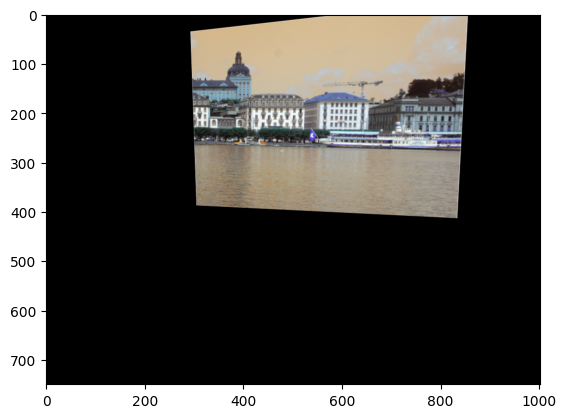

In [10]:
img1_height, img1_weight = img1.shape[:2]
img2_height, img2_weight = img2.shape[:2]

combined_img = cv2.warpPerspective(img2, Matrix, (img2_weight * 2, img2_height * 2))

plt.imshow(combined_img)
plt.show()

In [11]:
combined_img_height, combined_img_weight = combined_img.shape[:2]


In [19]:
import cv2
import numpy as np

# Read images
img1 = cv2.imread('pier_1.jpg')
img2 = cv2.imread('pier_2.jpg')
img3 = cv2.imread('pier_3.jpg')

# Define corresponding points for image 1 and image 2
pts1 = np.float32([[387, 118], [401, 118], [421, 210], [390, 148]])
pts2 = np.float32([[99, 91], [113.5, 92], [132.5, 184.5], [101.5, 121]])

# Calculate perspective transform matrix for image 1 and image 2
# Ensure that img1 and result have the same size
img1_resized = cv2.resize(img1, (result.shape[1], result.shape[0]))

# Blend img1_resized and result
# Resize result1 to match the size of blend1
result1_resized = cv2.resize(result1, (blend1.shape[1], blend1.shape[0]))

# Blend blend1 and result1_resized
blend2 = cv2.addWeighted(blend1, 0.9, result1_resized, 0.1, 0)

cv2.imshow('Blended Image', blend2)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/infor/miniconda3/envs/computervision/lib/python3.9/site-packages/cv2/qt/plugins"
